In [1]:
%load_ext autoreload
%autoreload 2
%env WANDB_SILENT=true

from pathlib import Path
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import quantstats as qs
import os
import logging
import sys


# Filter logs to only print from `nbtools`
class NbFilter(logging.Filter):
    def filter(self, record):
        return "nbtools" in record.getName()

logger = logging.getLogger("freqtrade.nbtools")
handler = logging.StreamHandler(stream=sys.stdout)
handler.setFormatter(logging.Formatter("%(name)s - %(message)s"))
logger.addHandler(handler)
# logger.addFilter(NbFilter())
logger.setLevel(logging.INFO)

qs.extend_pandas()
plt.style.use("seaborn-whitegrid")
pd.set_option('display.max_rows', 200)

if "freqtrade" not in os.listdir():
    import nest_asyncio
    nest_asyncio.apply()
    os.chdir("..")

PATH_MOUNT = Path.cwd().parent / "mount"
print("Working Directory:", os.getcwd())

# Freqtrade Imports
from freqtrade.optimize.optimize_reports import text_table_add_metrics
from freqtrade.nbtools.preset import LocalPreset
from freqtrade.nbtools.backtest import backtest
from freqtrade.nbtools import plotting

env: WANDB_SILENT=true
freqtrade.nbtools - Test Logging
Working Directory: C:\CS\Python\crypto-collection\freqtrade\superft


In [2]:
LOCAL_PRESET_NAME = "bigz04"
TIMERANGE = "20210501-20210601"

PATH_LOCAL_PRESET = PATH_MOUNT / "presets" / LOCAL_PRESET_NAME
PATH_LOCAL_DATADIR = PATH_MOUNT / "data"

preset = LocalPreset(
    path_local_preset=PATH_LOCAL_PRESET,
    path_data=PATH_LOCAL_DATADIR,
    timerange=TIMERANGE
)

stats, summary = backtest(preset, preset.default_strategy_code)
trades = pd.DataFrame(stats["strategy"]["NotebookStrategy"]["trades"])

Backtesting...
freqtrade.nbtools.preset.base_preset - Setting config for bigz04 ...
freqtrade.nbtools.preset.base_preset - Setting arg `datadir` to C:\CS\Python\crypto-collection\freqtrade\mount\data\binance
freqtrade.nbtools.preset.base_preset - Setting arg `timerange` to 20210501-20210601
freqtrade.nbtools.backtest - Strategy using minimal_roi: {'0': 0.028, '10': 0.018, '40': 0.005, '180': 0.018}
freqtrade.nbtools.backtest - Strategy using timeframe: 5m
freqtrade.nbtools.backtest - Strategy using stoploss: -0.99
freqtrade.nbtools.backtest - Strategy using trailing_stop: False
freqtrade.nbtools.backtest - Strategy using trailing_stop_positive: 0.01
freqtrade.nbtools.backtest - Strategy using trailing_stop_positive_offset: 0.025
freqtrade.nbtools.backtest - Strategy using trailing_only_offset_is_reached: False
freqtrade.nbtools.backtest - Strategy using use_custom_stoploss: True
freqtrade.nbtools.backtest - Strategy using process_only_new_candles: True
freqtrade.nbtools.backtest - Stra

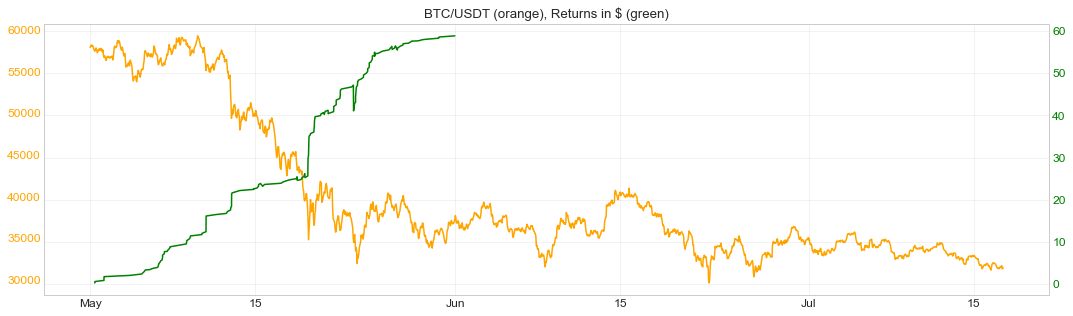

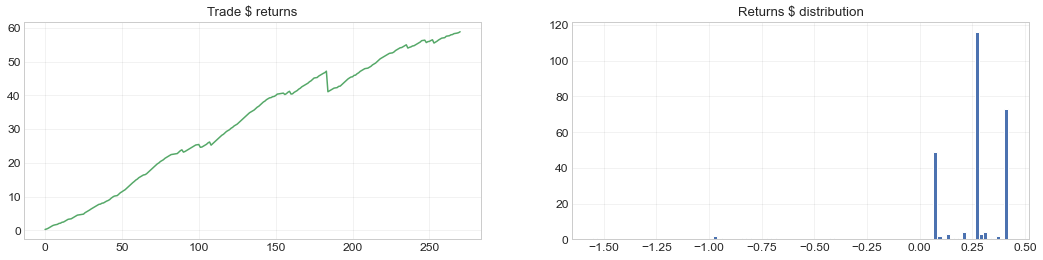

Portfolio Summary
------------------------------
Min Balance          : 0.27
Max Balance          : 58.84
End Balance          : 58.84
------------------------------
Trades               : 271
Avg. Profit %        : 1.45%
Avg. Profit $        : 0.22
Biggest Profit $     : 0.42
Biggest Loss $       : -6.09
------------------------------


In [3]:
plotting.plot_profits(
    trades,
    start = "2021-05-01",
    end = "2021-08-01",
    path_mount = PATH_MOUNT
)

In [8]:
# Running this cell will print backtest results
results = deepcopy(stats["strategy"]["NotebookStrategy"])

# Results per pair
results_per_pair = pd.DataFrame(results["results_per_pair"])
results_per_pair_df = results_per_pair.set_index("key").drop(columns=["profit_mean", "profit_total", "profit_sum"])
results_per_pair_df = results_per_pair_df.sort_values(by=["profit_total_abs"], ascending=False)
results_per_pair_df.round(2)

# Sell reason stats
sells = pd.DataFrame(results['sell_reason_summary'])
sells = sells.drop(columns=["profit_mean", "profit_total"]).set_index("sell_reason")

# Left open trades
left_open_trades = pd.DataFrame(results['left_open_trades'])
left_open_trades = left_open_trades.drop(columns=["profit_mean", "profit_total", "profit_sum"]).set_index("key")

# Summary metrics
metrics = text_table_add_metrics(results)
advanced_metrics = deepcopy(stats["metadata"])
advanced_metrics["profit_mean"] = advanced_metrics["profit_mean"] * 100
advanced_metrics["profit_median"] = advanced_metrics["profit_median"] * 100
advanced_metrics["profit_total"] = advanced_metrics["profit_total"] * 100

for key in list(advanced_metrics):
    value = advanced_metrics[key]
    valid = any(isinstance(value, it) for it in [str, int, float, bool])
    
    if not valid:
        del advanced_metrics[key]
        continue
    
    if isinstance(value, float):
        advanced_metrics[key] =  round(value, 3)
    
    advanced_metrics[key] = [advanced_metrics[key]]
    
advanced_metrics_df = pd.DataFrame(advanced_metrics)
    
print("Results Per Pair")
display(results_per_pair_df.round(2))
print("Sell Reasons")
display(sells.round(2))
print("Left Open Trades")
display(left_open_trades.round(2))
print("Freqtrade Summary Metrics")
print("=" * 48 + "\n" + metrics + "\n" + "=" * 48)
print("Advanced Metrics")
print("Preset Name:", advanced_metrics_df["preset_name"][0])
display(advanced_metrics_df.drop(columns=["preset_name"]).T)

Results Per Pair


,trades,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,
TOTAL,271,1.45,391.88,58.84,5.88,1:06:00,262,0,9
DOGE/USDT,17,2.01,34.11,5.12,0.51,0:18:00,17,0,0
KSM/USDT,9,2.26,20.34,3.05,0.31,0:08:00,9,0,0
MATIC/USDT,14,1.40,19.57,2.94,0.29,0:24:00,13,0,1
CAKE/USDT,9,2.13,19.18,2.88,0.29,1:52:00,9,0,0
ETC/USDT,14,1.34,18.71,2.81,0.28,0:30:00,14,0,0
LUNA/USDT,9,1.99,17.88,2.68,0.27,0:14:00,9,0,0
BAKE/USDT,9,1.80,16.20,2.43,0.24,0:37:00,9,0,0
NANO/USDT,7,1.94,13.59,2.04,0.20,0:21:00,7,0,0


Sell Reasons


,trades,wins,draws,losses,profit_mean_pct,profit_sum,profit_sum_pct,profit_total_abs,profit_total_pct
sell_reason,,,,,,,,,
roi,262,262,0,0,1.81,4.75,474.81,71.29,79.14
trailing_stop_loss,9,0,0,9,-9.21,-0.83,-82.93,-12.45,-13.82


Left Open Trades


,trades,profit_mean_pct,profit_sum_pct,profit_total_abs,profit_total_pct,duration_avg,wins,draws,losses
key,,,,,,,,,
TOTAL,0,0.0,0.0,0.0,0.0,0:00,0,0,0


Freqtrade Summary Metrics
| Metric                 | Value               |
|------------------------+---------------------|
| Backtesting from       | 2021-05-01 00:00:00 |
| Backtesting to         | 2021-06-01 00:00:00 |
| Max open trades        | 6                   |
|                        |                     |
| Total/Daily Avg Trades | 271 / 8.74          |
| Starting balance       | 1000.000 USDT       |
| Final balance          | 1058.840 USDT       |
| Absolute profit        | 58.840 USDT         |
| Total profit %         | 5.88%               |
| Avg. stake amount      | 15.000 USDT         |
| Total trade volume     | 4065.000 USDT       |
|                        |                     |
| Best Pair              | DOGE/USDT 34.11%    |
| Worst Pair             | CELO/USDT -38.78%   |
| Best trade             | EOS/USDT 2.8%       |
| Worst trade            | CELO/USDT -40.58%   |
| Best day               | 10.429 USDT         |
| Worst day              | 0.000 USDT      

,0
random_name,dissatisfied-rei-sanitizer
preset_type,LocalPreset
backtest_date,2021-07-18 17:10:11
leverage,1
direction,long
is_hedging,False
fee,0.001
num_pairs,64
data_source,binance
win_rate,0.967
